In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import numpy as np

In [ ]:
# Cargar datos en un DataFrame de Pandas
df = pd.read_excel("SpaceApps Data para Dolfi.xlsx")

# Asegúrate de que las columnas necesarias estén presentes en el DataFrame
# (IMF Spacecraft ID, Bx, By, Bz, Timeshift)
# df debe contener estas columnas para que el código funcione correctamente
df.columns

Index(['YYYY', 'DOY', 'HR', 'MN', 'ID for IMF spacecraft', 'Timeshift',
       'BX, nT (GSE, GSM)', 'BY, nT (GSE)', 'BZ, nT (GSE)'],
      dtype='object')

In [ ]:
df.head(2)

,YYYY,DOY,HR,MN,ID for IMF spacecraft,Timeshift,"BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)"
0,2022,1,0,0,51,4851,-4.32,2.85,-4.43
1,2022,1,0,5,51,4946,-4.88,3.32,-3.84


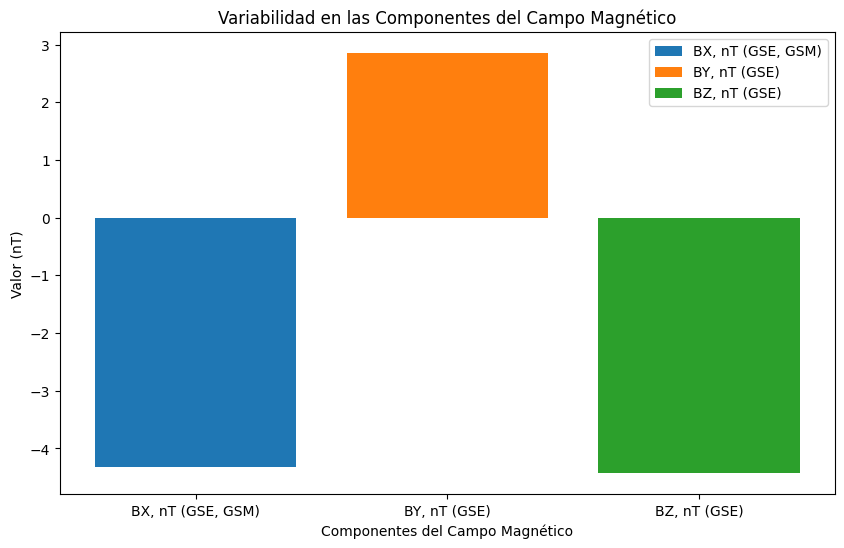

In [ ]:
# Variables a visualizar
variables = ['BX, nT (GSE, GSM)', 'BY, nT (GSE)', 'BZ, nT (GSE)']

# Crear gráficos de barras para cada variable
plt.figure(figsize=(10, 6))
for var in variables:
    plt.bar(var, df[var][0], label=var)

plt.xlabel('Componentes del Campo Magnético')
plt.ylabel('Valor (nT)')
plt.title('Variabilidad en las Componentes del Campo Magnético')
plt.legend()
plt.show()


In [ ]:
df.columns

Index(['YYYY', 'DOY', 'HR', 'MN', 'ID for IMF spacecraft', 'Timeshift',
       'BX, nT (GSE, GSM)', 'BY, nT (GSE)', 'BZ, nT (GSE)'],
      dtype='object')

In [ ]:
!pip install numpy scipy matplotlib


In [ ]:
from scipy.fft import fft

# Suponiendo que tienes un DataFrame llamado df con las columnas 'BX', 'BY' y 'BZ'
# ...

# Calcular la magnitud del campo magnético interplanetario (IMF)
df['B_norm'] = np.sqrt(df['BX, nT (GSE, GSM)']**2 + df['BY, nT (GSE)']**2 + df['BZ, nT (GSE)']**2)
df['B_norm']


0         6.812474
1         7.041477
2         7.468260
3         7.557837
4         7.550987
            ...   
106555    9.009628
106556    8.974776
106557    8.785306
106558    8.692951
106559    8.435010
Name: B_norm, Length: 106560, dtype: float64

In [ ]:
df.columns

Index(['YYYY', 'DOY', 'HR', 'MN', 'ID for IMF spacecraft', 'Timeshift',
       'BX, nT (GSE, GSM)', 'BY, nT (GSE)', 'BZ, nT (GSE)', 'B_norm'],
      dtype='object')

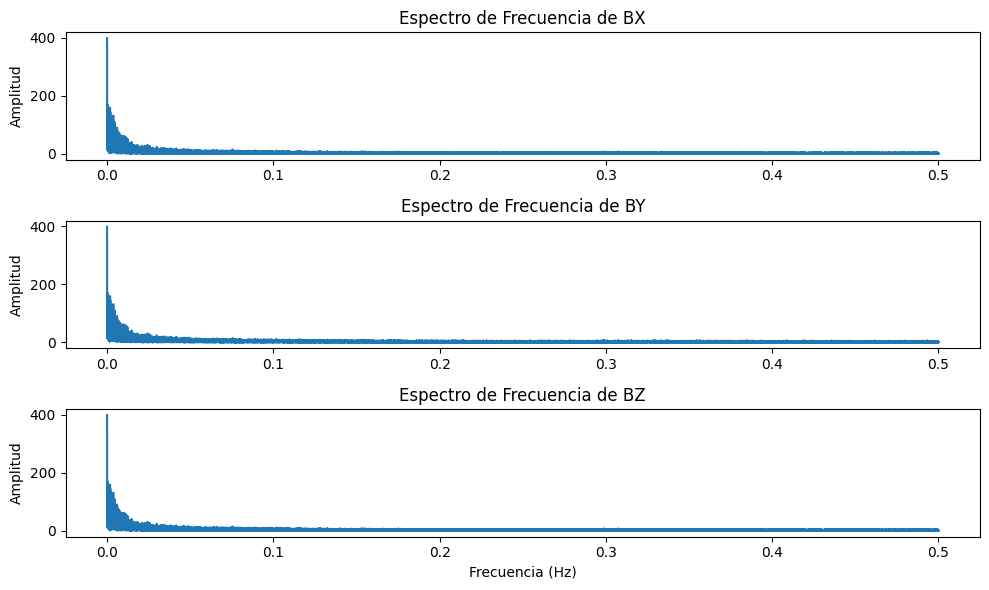

In [ ]:
# Frecuencia de muestreo (suponiendo intervalos de tiempo uniformes)
sampling_rate = 1  # Por ejemplo, si los datos están espaciados cada hora

# Realizar la Transformada de Fourier en cada componente del IMF
fft_bx = np.fft.fft(df['BX, nT (GSE, GSM)'])
fft_by = np.fft.fft(df['BY, nT (GSE)'])
fft_bz = np.fft.fft(df['BZ, nT (GSE)'])

# Calcular las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(df), d=1/sampling_rate)

# Filtrar las frecuencias positivas
positive_frequencies = frequencies[frequencies >= 0]

# Calcular los valores absolutos de la FFT y normalizar
fft_bx_values = 2.0 / len(df) * np.abs(fft_bx[:len(positive_frequencies)])
fft_by_values = 2.0 / len(df) * np.abs(fft_by[:len(positive_frequencies)])
fft_bz_values = 2.0 / len(df) * np.abs(fft_bz[:len(positive_frequencies)])

# Crear gráficos individuales para cada componente
plt.figure(figsize=(10, 6))

# Gráfico para la componente BX
plt.subplot(3, 1, 1)
plt.plot(positive_frequencies, fft_bx_values)
plt.ylabel('Amplitud')
plt.title('Espectro de Frecuencia de BX')

# Gráfico para la componente BY
plt.subplot(3, 1, 2)
plt.plot(positive_frequencies, fft_by_values)
plt.ylabel('Amplitud')
plt.title('Espectro de Frecuencia de BY')

# Gráfico para la componente BZ
plt.subplot(3, 1, 3)
plt.plot(positive_frequencies, fft_bz_values)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Espectro de Frecuencia de BZ')

plt.tight_layout()  # Ajusta automáticamente el espaciado entre subgráficos
plt.show()


El gráfico del espectro de frecuencia que hemos generado muestra cómo se distribuyen las frecuencias en las componentes del Campo Magnético Interplanetario (IMF). Permite visualizar las frecuencias presentes en los datos y sus respectivas amplitudes.

**Interpretación:**

1. **Frecuencias en el Eje X:** En el eje horizontal del gráfico, tienes las frecuencias en hertzios (Hz). Cada punto en el gráfico representa una frecuencia específica. Por ejemplo, si ves un pico en 0.1 Hz, significa que hay una componente sinusoidal en los datos que se repite aproximadamente cada 10 segundos.

2. **Amplitudes en el Eje Y:** En el eje vertical, tienes las amplitudes de las frecuencias correspondientes. Las alturas de los picos indican la intensidad o fuerza de la frecuencia respectiva. Un pico alto indica una frecuencia dominante en los datos.

**Usos y Observaciones:**

- **Identificar Frecuencias Dominantes:** Los picos más altos en el espectro representan las frecuencias más dominantes en las componentes del IMF. Estos picos podrían indicar patrones recurrentes o periódicos en los datos.

- **Identificar Patrones Periódicos:** Si ves picos en frecuencias específicas, podría indicar la presencia de patrones periódicos en las componentes del IMF. Estos patrones podrían estar relacionados con eventos solares u otros fenómenos espaciales.

- **Análisis de Frecuencias de Interés:** Dependiendo del contexto de tu estudio, ciertas frecuencias pueden ser de particular interés. Por ejemplo, frecuencias en el rango de las horas pueden estar asociadas con ciertos fenómenos solares, mientras que frecuencias más altas podrían estar relacionadas con eventos más rápidos en el viento solar.

- **Anomalías o Cambios en el Espectro:** Cambios inusuales en el espectro, como picos adicionales o cambios en la amplitud de ciertas frecuencias, podrían indicar eventos o anomalías en las componentes del IMF.

Este tipo de análisis es fundamental en campos como la astrofísica y la meteorología espacial. Ayuda a los científicos a entender los patrones temporales en los datos y a prever eventos solares y su impacto en nuestro entorno espacial cercano, incluyendo la Tierra.

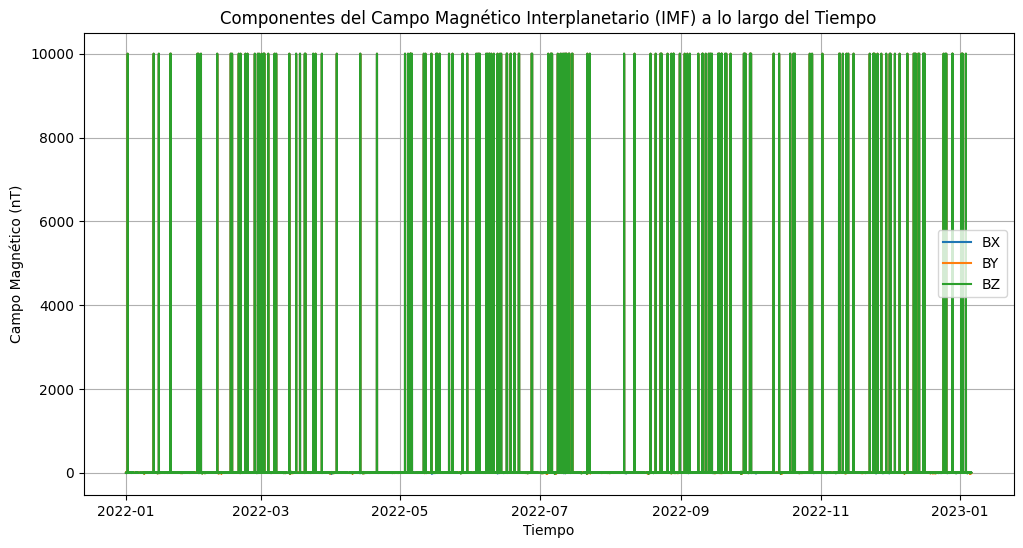

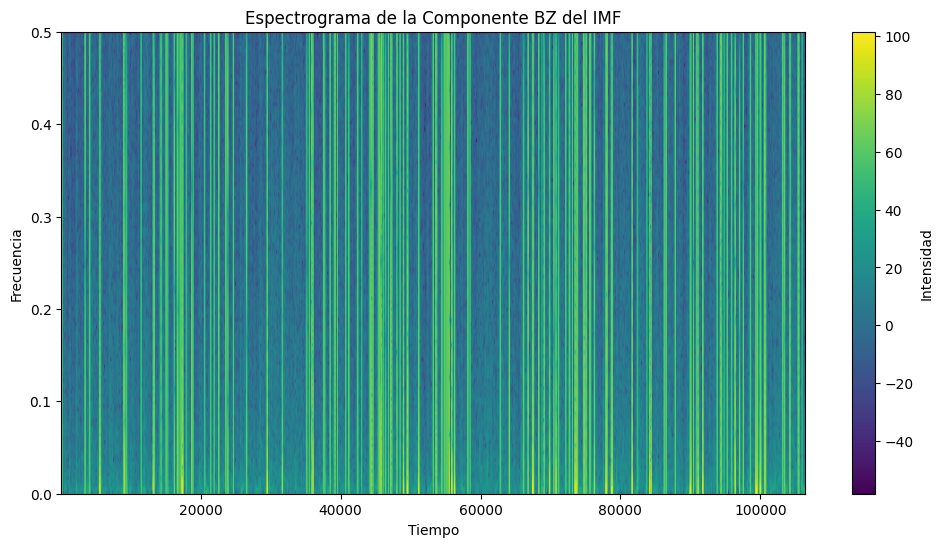

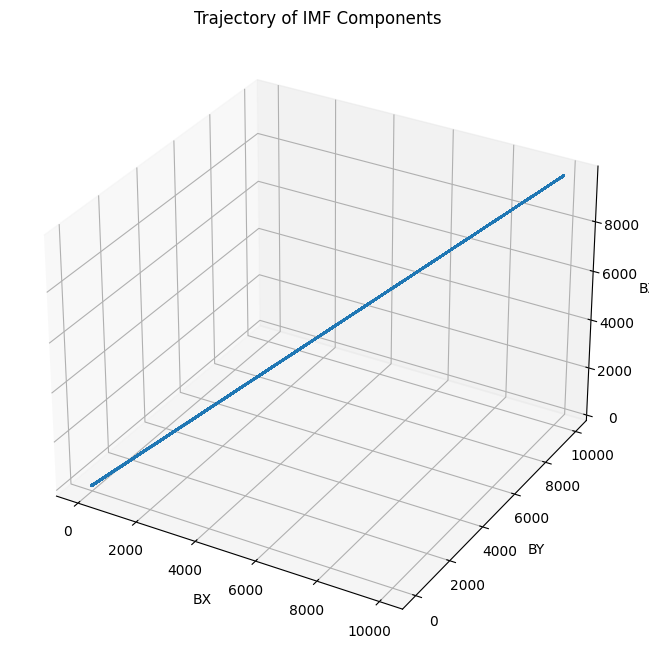

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset (reemplaza 'tu_archivo.csv' con el nombre real de tu archivo)
# df = pd.read_csv('tu_archivo.csv')

# Convierte las columnas de tiempo a un formato adecuado (Asume que las columnas son 'YYYY', 'DOY', 'HR', 'MN')
# Convierte las columnas de tiempo a un formato adecuado
df['Timestamp'] = pd.to_datetime(df[['YYYY', 'DOY']].astype(str).agg('-'.join, axis=1) + ' ' +
                                  df['HR'].astype(str).str.zfill(2) + ':' + df['MN'].astype(str).str.zfill(2),
                                  format='%Y-%j %H:%M')


# Visualización temporal básica
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['BX, nT (GSE, GSM)'], label='BX')
plt.plot(df['Timestamp'], df['BY, nT (GSE)'], label='BY')
plt.plot(df['Timestamp'], df['BZ, nT (GSE)'], label='BZ')
plt.xlabel('Tiempo')
plt.ylabel('Campo Magnético (nT)')
plt.title('Componentes del Campo Magnético Interplanetario (IMF) a lo largo del Tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Espectrograma para visualizar la variación frecuencial en el tiempo
plt.figure(figsize=(12, 6))
plt.specgram(df['BZ, nT (GSE)'], Fs=1, NFFT=256, noverlap=128, cmap='viridis')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.title('Espectrograma de la Componente BZ del IMF')
plt.colorbar(label='Intensidad')
plt.show()

# Visualización 3D (requiere mpl_toolkits.mplot3d)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df['BX, nT (GSE, GSM)'], df['BY, nT (GSE)'], df['BZ, nT (GSE)'], label='Trajectory')
ax.set_xlabel('BX')
ax.set_ylabel('BY')
ax.set_zlabel('BZ')
ax.set_title('Trajectory of IMF Components')
plt.show()


1. Visualización Temporal:
Este gráfico muestra cómo varían las componentes del Campo Magnético Interplanetario (IMF) (BX, BY, y BZ) a lo largo del tiempo. En el eje X, tienes el tiempo representado en formato de fecha y hora, y en el eje Y, tienes el valor del campo magnético en nanoTesla (nT).

Interpretación:
Puedes observar las fluctuaciones y patrones en el campo magnético a medida que el tiempo avanza. Estos patrones pueden indicar variaciones regulares o eventos inusuales en el IMF.
2. Espectrograma:
El espectrograma representa cómo las frecuencias en la componente BX del IMF varían en función del tiempo. Las frecuencias se representan en el eje Y, el tiempo en el eje X, y la intensidad de la frecuencia se muestra a través del color (más intenso significa una frecuencia más fuerte).

Interpretación:
Las áreas más brillantes en el espectrograma indican frecuencias dominantes en ciertos momentos. Estas frecuencias pueden estar asociadas con eventos solares o variaciones en el viento solar. La variación en colores y patrones puede ser indicativa de cambios en la fuente de estas frecuencias.
3. Visualización 3D:
Este gráfico muestra la trayectoria tridimensional de las componentes del IMF (BX, BY y BZ). Cada eje representa una de las componentes del IMF, y la línea en el espacio muestra cómo estas componentes cambian simultáneamente.

Interpretación:
La trayectoria tridimensional proporciona una representación visual de cómo las componentes del IMF están correlacionadas entre sí. Puedes observar patrones y tendencias en cómo estas componentes cambian juntas a lo largo del tiempo.

In [ ]:
df.head()


,YYYY,DOY,HR,MN,ID for IMF spacecraft,Timeshift,"BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)",B_norm,Timestamp
0,2022,1,0,0,51,4851,-4.32,2.85,-4.43,6.812474,2022-01-01 00:00:00
1,2022,1,0,5,51,4946,-4.88,3.32,-3.84,7.041477,2022-01-01 00:05:00
2,2022,1,0,10,51,4653,-5.67,2.98,-3.84,7.468260,2022-01-01 00:10:00
3,2022,1,0,15,51,4041,-5.24,1.52,-5.23,7.557837,2022-01-01 00:15:00
4,2022,1,0,20,51,3811,-5.18,1.25,-5.35,7.550987,2022-01-01 00:20:00


In [ ]:
df

,YYYY,DOY,HR,MN,ID for IMF spacecraft,Timeshift,"BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)",B_norm,Timestamp
0,2022,1,0,0,51,4851,-4.32,2.85,-4.43,6.812474,2022-01-01 00:00:00
1,2022,1,0,5,51,4946,-4.88,3.32,-3.84,7.041477,2022-01-01 00:05:00
2,2022,1,0,10,51,4653,-5.67,2.98,-3.84,7.468260,2022-01-01 00:10:00
3,2022,1,0,15,51,4041,-5.24,1.52,-5.23,7.557837,2022-01-01 00:15:00
4,2022,1,0,20,51,3811,-5.18,1.25,-5.35,7.550987,2022-01-01 00:20:00
...,...,...,...,...,...,...,...,...,...,...,...
106555,2023,5,23,35,51,4359,-0.41,-7.03,5.62,9.009628,2023-01-05 23:35:00
106556,2023,5,23,40,51,4372,-0.29,-7.52,4.89,8.974776,2023-01-05 23:40:00
106557,2023,5,23,45,51,4403,-0.02,-7.46,4.64,8.785306,2023-01-05 23:45:00
106558,2023,5,23,50,51,4491,-0.23,-7.47,4.44,8.692951,2023-01-05 23:50:00
